## DNN and CNN for Image processing and clasification

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [2]:
train_dir = r'C:\Users\Ikhityor\Desktop\My_Projects\Image processing\cats_and_dogs_small\train'
validation_dir = r'C:\Users\Ikhityor\Desktop\My_Projects\Image processing\cats_and_dogs_small\validation'
test_dir = r'C:\Users\Ikhityor\Desktop\My_Projects\Image processing\cats_and_dogs_small\test'

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
# Generating batches of tensor image data

train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size= (150, 150),
        batch_size= 20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size= (150, 150),
        batch_size= 20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [27]:
model= models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [29]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [30]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5",
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

history= model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50,
        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
100/100 [==============================] - 14s 142ms/step - loss: 0.6919 - acc: 0.5260 - val_loss: 0.6705 - val_acc: 0.5880
Epoch 2/100
100/100 [==============================] - 14s 139ms/step - loss: 0.6636 - acc: 0.6055 - val_loss: 0.6450 - val_acc: 0.6410
Epoch 3/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6149 - acc: 0.6670 - val_loss: 0.6421 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 14s 137ms/step - loss: 0.5740 - acc: 0.6975 - val_loss: 0.5979 - val_acc: 0.6770
Epoch 5/100
100/100 [==============================] - 14s 140ms/step - loss: 0.5466 - acc: 0.7240 - val_loss: 0.6043 - val_acc: 0.6700
Epoch 6/100
100/100 [==============================] - 14s 139ms/step - loss: 0.5273 - acc: 0.7270 - val_loss: 0.5774 - val_acc: 0.6840
Epoch 7/100
100/100 [==============================] - 14s 142ms/step - loss: 0.4906 - acc: 0.7690 - val_loss: 0.6393 - val_acc: 0.6490
Epoch 8/100
100/100 [===========================

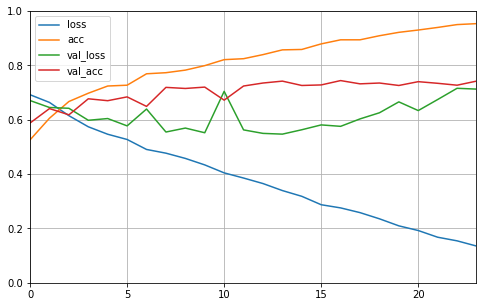

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
model= keras.models.load_model('early_stop_model.h5')
model.evaluate_generator(test_generator, steps=50)

[0.5426420569419861, 0.7450000047683716]

In [12]:
from tensorflow.keras import backend as K
K.clear_session()
del model

# Data Augmentation

In [8]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip= True,)

test_datagen= ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size= (150, 150),
        batch_size= 20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size= (150, 150),
        batch_size= 20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
model= models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model_aug.h5",
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history= model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50,
        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
100/100 [==============================] - 40s 397ms/step - loss: 0.6946 - acc: 0.5230 - val_loss: 0.6832 - val_acc: 0.5220
Epoch 2/100
100/100 [==============================] - 40s 397ms/step - loss: 0.6880 - acc: 0.5425 - val_loss: 0.6768 - val_acc: 0.5800
Epoch 3/100
100/100 [==============================] - 40s 404ms/step - loss: 0.6737 - acc: 0.5770 - val_loss: 0.6693 - val_acc: 0.5720
Epoch 4/100
100/100 [==============================] - 40s 403ms/step - loss: 0.6672 - acc: 0.5860 - val_loss: 0.6410 - val_acc: 0.6200
Epoch 5/100
100/100 [==============================] - 40s 405ms/step - loss: 0.6584 - acc: 0.5940 - val_loss: 0.6623 - val_acc: 0.6030
Epoch 6/100
100/100 [==============================] - 42s 417ms/step - loss: 0.6464 - acc: 0.6165 - val_loss: 0.6164 - val_acc: 0.6580
Epoch 7/100
100/100 [==============================] - 43s 432ms/step - loss: 0.6326 - acc: 0.6190 - val_loss: 0.6058 - val_acc: 0.6730
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 41s 406ms/step - loss: 0.4450 - acc: 0.7965 - val_loss: 0.4244 - val_acc: 0.8020
Epoch 62/100
100/100 [==============================] - 41s 413ms/step - loss: 0.4609 - acc: 0.7785 - val_loss: 0.4364 - val_acc: 0.7860
Epoch 63/100
100/100 [==============================] - 41s 407ms/step - loss: 0.4438 - acc: 0.7930 - val_loss: 0.4404 - val_acc: 0.7910
Epoch 64/100
100/100 [==============================] - 41s 409ms/step - loss: 0.4360 - acc: 0.7960 - val_loss: 0.4382 - val_acc: 0.7920
Epoch 65/100
100/100 [==============================] - 41s 406ms/step - loss: 0.4241 - acc: 0.7995 - val_loss: 0.4623 - val_acc: 0.7780
Epoch 66/100
100/100 [==============================] - 41s 407ms/step - loss: 0.4354 - acc: 0.7850 - val_loss: 0.4821 - val_acc: 0.7770
Epoch 67/100
100/100 [==============================] - 41s 408ms/step - loss: 0.4446 - acc: 0.7980 - val_loss: 0.4104 - val_acc: 0.8060
Epoch 68/100
100/100 [===================

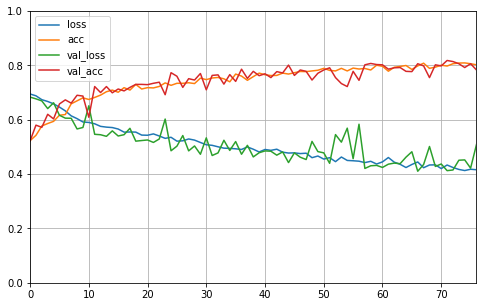

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
model1= keras.models.load_model('early_stop_model_aug.h5')
model1.evaluate_generator(test_generator, steps=50)

[0.4516581892967224, 0.7900000214576721]

In [25]:
K.clear_session()
del model

# Transfer Learning VGG64

In [7]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip= True,)

test_datagen= ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size= (150, 150),
        batch_size= 20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size= (150, 150),
        batch_size= 20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import VGG16

In [9]:
conv_base= VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150, 150, 3))


In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [13]:
model= models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model_trf.h5",
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
                                                  restore_best_weights=True)



In [18]:
history= model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50,
        callbacks=[checkpoint_cb, early_stopping_cb])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 46s 458ms/step - loss: 0.6313 - acc: 0.6415 - val_loss: 0.4279 - val_acc: 0.7950
Epoch 2/30
100/100 [==============================] - 46s 459ms/step - loss: 0.4297 - acc: 0.7930 - val_loss: 0.2316 - val_acc: 0.9120
Epoch 3/30
100/100 [==============================] - 46s 460ms/step - loss: 0.3208 - acc: 0.8680 - val_loss: 0.2262 - val_acc: 0.9190
Epoch 4/30
100/100 [==============================] - 46s 457ms/step - loss: 0.2517 - acc: 0.8860 - val_loss: 0.6263 - val_acc: 0.8100
Epoch 5/30
100/100 [==============================] - 47s 465ms/step - loss: 0.2209 - acc: 0.9085 - val_loss: 0.1204 - val_acc: 0.9510
Epoch 6/30
100/100 [==============================] - 46s 461ms/step - loss: 0.1930 - acc: 0.9225 - val_loss: 0.3003 - val_acc: 0.9040
Epoch 7/30
100/100 [==============================] - 46s 463ms/step - loss: 0.1859 - acc: 0.9245 - val_loss: 0.17

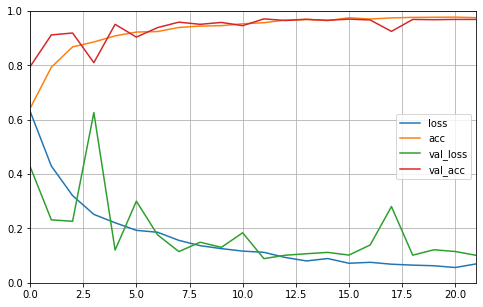

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [5]:
model= keras.models.load_model('early_stop_model_trf.h5')

In [7]:
test_datagen= ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size= (150, 150),
        batch_size= 20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [8]:
model.evaluate_generator(test_generator, steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.09295416623353958, 0.9700000286102295]

# Hyperparameters tuning with Keras tuner

In [15]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [9]:
def model_builder(hp):
    model= models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= (150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))

    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=hp_learning_rate), metrics=['acc'])

    return model


In [14]:
import kerastuner as kt

tuner = kt.Hyperband(
    model_builder,
    objective='val_acc',
    max_epochs=30,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [15]:
tuner.search(train_generator,
             validation_data=validation_generator,
             epochs=30,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Trial 60 Complete [00h 01m 35s]
val_acc: 0.6000000238418579

Best val_acc So Far: 0.6669999957084656
Total elapsed time: 00h 59m 21s
INFO:tensorflow:Oracle triggered exit


In [16]:
best_model = tuner.get_best_models(1)[0]

In [19]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_tuner_model.h5",
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
                                                  restore_best_weights=True)

history= best_model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=50,
        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
100/100 [==============================] - 23s 233ms/step - loss: 0.5098 - acc: 0.7620 - val_loss: 0.4833 - val_acc: 0.7680
Epoch 2/50
100/100 [==============================] - 23s 232ms/step - loss: 0.5065 - acc: 0.7615 - val_loss: 0.4356 - val_acc: 0.7950
Epoch 3/50
100/100 [==============================] - 23s 230ms/step - loss: 0.5013 - acc: 0.7595 - val_loss: 0.4675 - val_acc: 0.7900
Epoch 4/50
100/100 [==============================] - 24s 236ms/step - loss: 0.4940 - acc: 0.7640 - val_loss: 0.4467 - val_acc: 0.7810l
Epoch 5/50
100/100 [==============================] - 23s 234ms/step - loss: 0.4866 - acc: 0.7645 - val_loss: 0.4882 - val_acc: 0.7570
Epoch 6/50
100/100 [==============================] - 24s 236ms/step - loss: 0.4982 - acc: 0.7655 - val_loss: 0.4811 - val_acc: 0.7910
Epoch 7/50
100/100 [==============================] - 24s 239ms/step - loss: 0.4929 - acc: 0.7715 - val_loss: 0.4473 - val_acc: 0.7940
Epoch 8/50
100/100 [==============================] - 

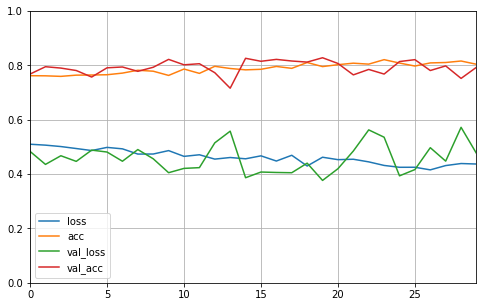

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model= keras.models.load_model('keras_tuner_model.h5')

In [21]:
test_datagen= ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size= (150, 150),
        batch_size= 20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [22]:
model.evaluate_generator(test_generator, steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.4386897683143616, 0.8209999799728394]